In [84]:
# importing all necessary libraries and loading the table
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

df = pd.read_csv('Bank-Records.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [85]:
# Dropping the columns RowNumber, CustomerId and Surname as they don't hold much significance at identifying & analyzing the customer churn rates
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

# Checking for null values in the remaining columns
df.isnull().sum()

CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Geography           10000 non-null  object 
 2   Gender              10000 non-null  object 
 3   Age                 10000 non-null  int64  
 4   Tenure              10000 non-null  int64  
 5   Balance             10000 non-null  float64
 6   NumOfProducts       10000 non-null  int64  
 7   HasCrCard           10000 non-null  int64  
 8   IsActiveMember      10000 non-null  int64  
 9   EstimatedSalary     10000 non-null  float64
 10  Exited              10000 non-null  int64  
 11  Complain            10000 non-null  int64  
 12  Satisfaction Score  10000 non-null  int64  
 13  Card Type           10000 non-null  object 
 14  Point Earned        10000 non-null  int64  
dtypes: float64(2), int64(10), object(3)
memory usage: 1.1+

Converting Card type Attribute as a categorical variable

In [87]:
df["Card Type"] = df["Card Type"].astype("category")
df["Card Type"].unique()

['DIAMOND', 'GOLD', 'SILVER', 'PLATINUM']
Categories (4, object): ['DIAMOND', 'GOLD', 'PLATINUM', 'SILVER']

In [88]:
df["Card Type"] = df["Card Type"].cat.reorder_categories(
    ['PLATINUM', 'DIAMOND', 'GOLD', 'SILVER'])


Converting `HasCrCard`, `IsActiveMember`, `Exited`, `Complain` attributes to Boolean Values

In [89]:
# HasCrCard dtype conversion to Bool
df["HasCrCard"] = df["HasCrCard"].astype(bool)
# IsActiveMember dtype conversion to Bool
df["IsActiveMember"] = df["IsActiveMember"].astype(bool)
# Exited dtype conversion to Bool
df["Exited"] = df["Exited"].astype(bool)
# Complain dtype conversion to Bool
df["Complain"] = df["Complain"].astype(bool)

In [90]:
print(f"Total Entries: {df.shape[0]}\nTotal Columns: {df.shape[1]}\nColumn Names: {df.columns}")

Total Entries: 10000
Total Columns: 15
Column Names: Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'Complain', 'Satisfaction Score', 'Card Type',
       'Point Earned'],
      dtype='object')


In [91]:
df.describe(include=np.number)

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Satisfaction Score,Point Earned
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881,3.013800,606.515100
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818,1.405919,225.924839
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000,1.000000,119.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000,2.000000,410.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000,3.000000,605.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500,4.000000,801.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000,5.000000,1000.000000


In [92]:
# Creating bins for Age group
df["AgeCategory"] = pd.cut(df["Age"], bins=[17, 30, 50, 60, 95], labels=[
                    "18-30", "31-50", "51-60", "60+"])
# Creating bins for Credit Score group
df["CreditScoreCategory"] = pd.cut(df["CreditScore"], bins=4, labels=[
                           "Low", "Med", "High", "VeryHigh"])
# Creating bins for Points group
df["PointsCategory"] = pd.cut(df["Point Earned"], bins=4, labels=[
                           "Low", "Med", "High", "VeryHigh"])

In [93]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned,AgeCategory,CreditScoreCategory,PointsCategory
0,619,France,Female,42,2,0.00,1,True,True,101348.88,True,True,2,DIAMOND,464,31-50,High,Med
1,608,Spain,Female,41,1,83807.86,1,False,True,112542.58,False,True,3,DIAMOND,456,31-50,High,Med
2,502,France,Female,42,8,159660.80,3,True,False,113931.57,True,True,3,DIAMOND,377,31-50,Med,Med
3,699,France,Female,39,1,0.00,2,False,False,93826.63,False,False,5,GOLD,350,31-50,High,Med
4,850,Spain,Female,43,2,125510.82,1,True,True,79084.10,False,False,5,GOLD,425,31-50,VeryHigh,Med


# Performing Analysis of Categorical Attributes

### Impact of Geography on Customer Churn

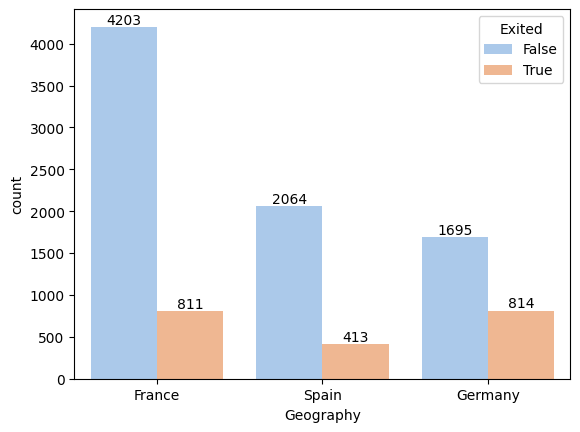

In [94]:
ax = sns.countplot(data=df, x="Geography", hue="Exited", palette="pastel")
for container in ax.containers:
    ax.bar_label(container)

In [95]:
pd.crosstab(df["Geography"], df["Exited"])

Exited,False,True
Geography,,
France,4203,811
Germany,1695,814
Spain,2064,413


In [96]:
_, p_value, _, _ = chi2_contingency(pd.crosstab(
    df["Geography"], df["Exited"]))
print(p_value)
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print(
        f"We can say with {(1-alpha)*100}% confidence that Geography attribute has an impact on Customer Churn rate")
else:
    print("Fail to reject H0")
    print("Geography attribute does not have an impact on Customer Churn rate")

5.245736109572763e-66
Reject H0
We can say with 95.0% confidence that Geography attribute has an impact on Customer Churn rate


In [97]:
print("Percentage of Customers Exited Belonging to different Geography:")
for score in df["Geography"].unique():
    print(f'{score}: {(df[(df["Geography"] == score) & df["Exited"]]["Geography"].count())*100/df[df["Geography"] ==score]["Geography"].count():.2f}%')

Percentage of Customers Exited Belonging to different Geography:
France: 16.17%
Spain: 16.67%
Germany: 32.44%


Highest Churn rate is observed for Germany. 32.44% of German Customers have left the bank.

### Impact of Gender on Customer Churn

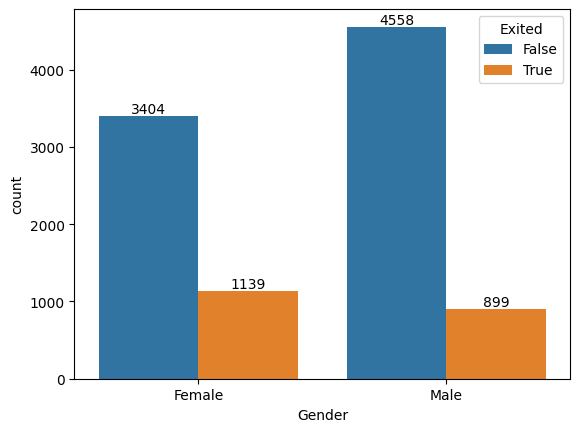

In [98]:
ax = sns.countplot(data=df, x="Gender", hue="Exited")
for container in ax.containers:
    ax.bar_label(container)

In [99]:
pd.crosstab(df["Gender"], df["Exited"])

Exited,False,True
Gender,,
Female,3404,1139
Male,4558,899


In [100]:
_, p_value, _, _ = chi2_contingency(pd.crosstab(
    df["Gender"], df["Exited"]))
print(p_value)
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print(
        f"We can say with {(1-alpha)*100}% confidence that Gender attribute has an impact on Customer Churn rate")
else:
    print("Fail to reject H0")
    print("Gender attribute does not have an impact on Customer Churn rate")

2.9253677618641993e-26
Reject H0
We can say with 95.0% confidence that Gender attribute has an impact on Customer Churn rate


In [101]:
print("Percentage of Customers Exited belonging to different gender:")
for score in df["Gender"].unique():
    print(f'{score}: {(df[(df["Gender"] == score) & df["Exited"]]["Gender"].count())*100/df[df["Gender"] ==score]["Gender"].count():.2f}%')

Percentage of Customers Exited belonging to different gender:
Female: 25.07%
Male: 16.47%


Females have a higher churn rate overall.
25.07% of female customers have left the bank

### Impact of Card Type on Customer Churn

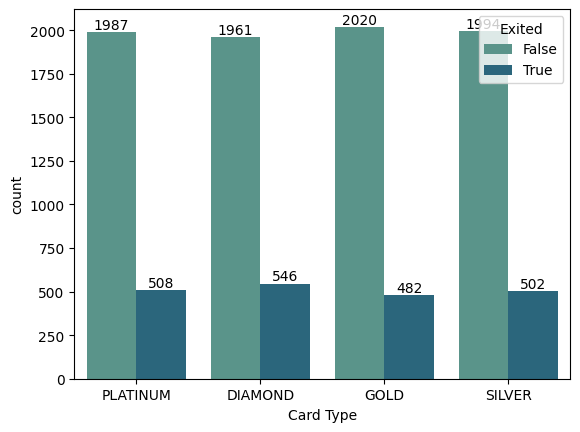

In [102]:
ax = sns.countplot(data=df, x="Card Type", hue="Exited", palette="crest")
for container in ax.containers:
    ax.bar_label(container)

In [103]:
pd.crosstab(df["Card Type"], df["Exited"])

Exited,False,True
Card Type,,
PLATINUM,1987,508
DIAMOND,1961,546
GOLD,2020,482
SILVER,1994,502


In [104]:
_, p_value, _, _ = chi2_contingency(pd.crosstab(
    df["Card Type"], df["Exited"]))
print(p_value)
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print(
        f"We can say with {(1-alpha)*100}% confidence that Card Type attribute has an impact on Customer Churn rate")
else:
    print("Fail to reject H0")
    print("Card Type attribute does not have an impact on Customer Churn rate")

0.16794112067810218
Fail to reject H0
Card Type attribute does not have an impact on Customer Churn rate


### Impact of IsActiveMember on Customer Churn

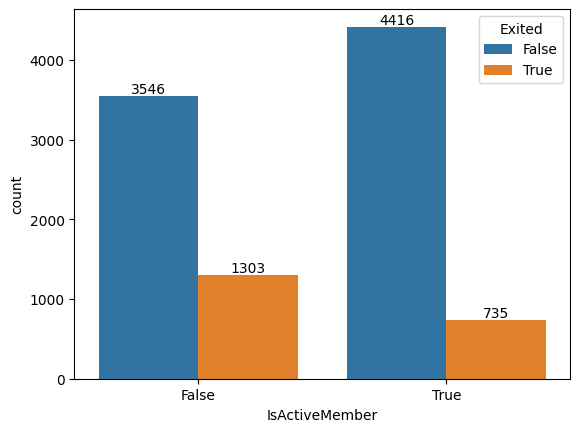

In [105]:
ax = sns.countplot(data=df, x="IsActiveMember", hue="Exited")
for container in ax.containers:
    ax.bar_label(container)

In [106]:
pd.crosstab(df["IsActiveMember"], df["Exited"])

Exited,False,True
IsActiveMember,,
False,3546,1303
True,4416,735


In [107]:
_, p_value, _, _ = chi2_contingency(pd.crosstab(
    df["IsActiveMember"], df["Exited"]))
print(p_value)
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print(
        f"We can say with {(1-alpha)*100}% confidence that IsActiveMember attribute has an impact on Customer Churn rate")
else:
    print("Fail to reject H0")
    print("IsActiveMember attribute does not have an impact on Customer Churn rate")

6.153167438113409e-55
Reject H0
We can say with 95.0% confidence that IsActiveMember attribute has an impact on Customer Churn rate


In [108]:
print("Percentage of Customers Exited based on Activity:")
for score in df["IsActiveMember"].unique():
    print(f'{score}: {(df[(df["IsActiveMember"] == score) & df["Exited"]]["IsActiveMember"].count())*100/df[df["IsActiveMember"] ==score]["IsActiveMember"].count():.2f}%')

Percentage of Customers Exited based on Activity:
True: 14.27%
False: 26.87%


Customers who are inactive are more likely to leave.
26.87% of inactive members have left the bank.

### Impact of Age on Customer Churn

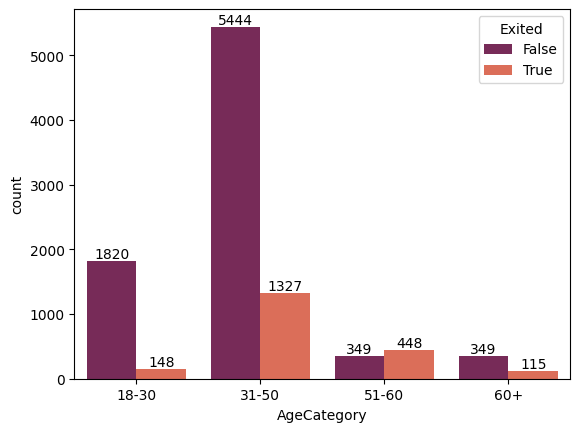

In [109]:
ax = sns.countplot(data=df, x="AgeCategory", hue="Exited", palette="rocket")
for container in ax.containers:
    ax.bar_label(container)

In [110]:
pd.crosstab(df["AgeCategory"], df["Exited"])

Exited,False,True
AgeCategory,,
18-30,1820,148
31-50,5444,1327
51-60,349,448
60+,349,115


In [111]:
_, p_value, _, _ = chi2_contingency(pd.crosstab(
    df["AgeCategory"], df["Exited"]))
print(p_value)
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print(
        f"We can say with {(1-alpha)*100}% confidence that Age attribute has an impact on Customer Churn rate")
else:
    print("Fail to reject H0")
    print("Age attribute does not have an impact on Customer Churn rate")

1.3288727805725445e-181
Reject H0
We can say with 95.0% confidence that Age attribute has an impact on Customer Churn rate


In [112]:
print("Percentage of Customers Exited belonging to different age groups:")
for score in df["AgeCategory"].unique():
    print(f'{score}: {(df[(df["AgeCategory"] == score) & df["Exited"]]["AgeCategory"].count())*100/df[df["AgeCategory"] ==score]["AgeCategory"].count():.2f}%')

Percentage of Customers Exited belonging to different age groups:
31-50: 19.60%
18-30: 7.52%
51-60: 56.21%
60+: 24.78%


Customers belonging to age group 51-60 have a much higher churn rate than others.
56.21% of Customers belonging to age group 51-60 have left the bank.

### Impact of Cusotmer Credit Score on Churn

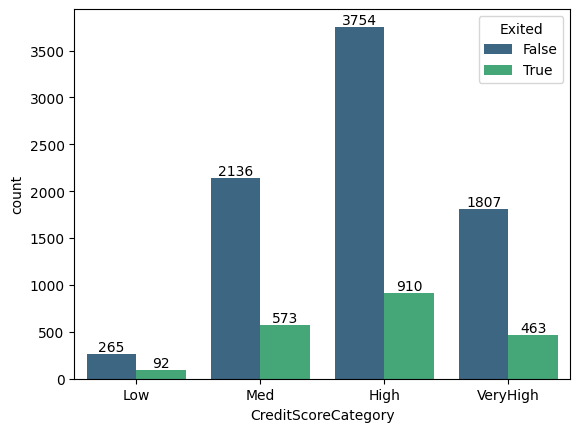

In [113]:
ax = sns.countplot(data=df, x="CreditScoreCategory", hue="Exited", palette="viridis")
for container in ax.containers:
    ax.bar_label(container)

In [114]:
pd.crosstab(df["CreditScoreCategory"], df["Exited"])

Exited,False,True
CreditScoreCategory,,
Low,265,92
Med,2136,573
High,3754,910
VeryHigh,1807,463


In [115]:
_, p_value, _, _ = chi2_contingency(pd.crosstab(
    df["CreditScoreCategory"], df["Exited"]))
print(p_value)
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print(
        f"We can say with {(1-alpha)*100}% confidence that Credit Score attribute has an impact on Customer Churn rate")
else:
    print("Fail to reject H0")
    print("Credit Score attribute does not have an impact on Customer Churn rate")

0.022733419907030667
Reject H0
We can say with 95.0% confidence that Credit Score attribute has an impact on Customer Churn rate


In [116]:
print("Percentage of Customers Exited with different credit score categories:")
for score in df["CreditScoreCategory"].unique():
    print(f'{score}: {(df[(df["CreditScoreCategory"] == score) & df["Exited"]]["CreditScore"].count())*100/df[df["CreditScoreCategory"] ==score]["CreditScore"].count():.2f}%')

Percentage of Customers Exited with different credit score categories:
High: 19.51%
Med: 21.15%
VeryHigh: 20.40%
Low: 25.77%


Customers falling under Low credit score category have highest ratio of Churn at 25.77%. That is, 25.77% of the customers with Low Credit score have left the bank.

### Impact of Points on Customer Churn

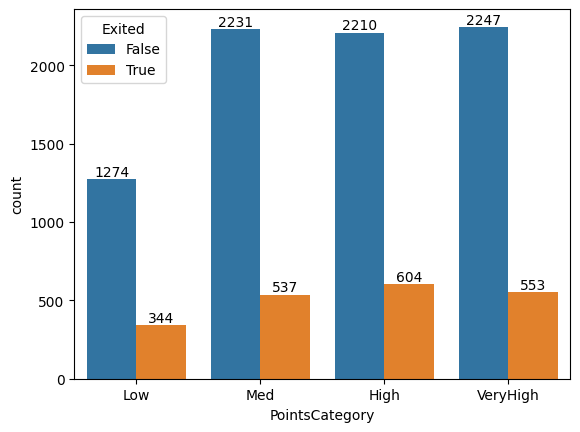

In [117]:
ax = sns.countplot(data=df, x="PointsCategory", hue="Exited")
for container in ax.containers:
    ax.bar_label(container)

In [118]:
pd.crosstab(df["PointsCategory"], df["Exited"])

Exited,False,True
PointsCategory,,
Low,1274,344
Med,2231,537
High,2210,604
VeryHigh,2247,553


In [119]:
_, p_value, _, _ = chi2_contingency(pd.crosstab(
    df["PointsCategory"], df["Exited"]))
print(p_value)
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print(
        f"We can say with {(1-alpha)*100}% confidence that Points aatribute has an impact on Customer Churn rate")
else:
    print("Fail to reject H0")
    print("Points attribute does not have an impact on Customer Churn rate")

0.16224407388567408
Fail to reject H0
Points attribute does not have an impact on Customer Churn rate


### Impact of Complain on Customer Churn

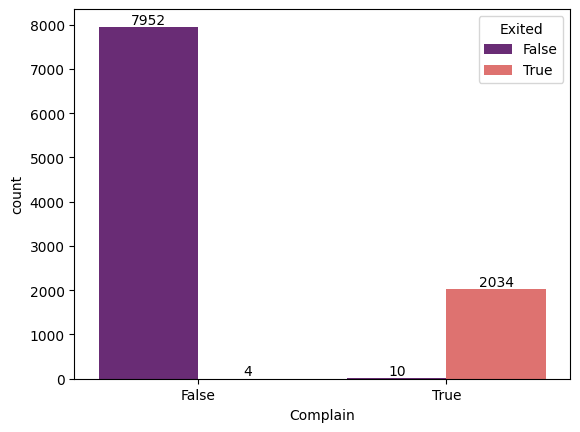

In [120]:
ax = sns.countplot(data=df, x="Complain", hue="Exited", palette="magma")
for container in ax.containers:
    ax.bar_label(container)

In [121]:
_, p_value, _, _ = chi2_contingency(pd.crosstab(
    df["Complain"], df["Exited"]))
print(p_value)
alpha = 0.05

if p_value < alpha:
    print("Reject H0")
    print(
        f"We can say with {(1-alpha)*100}% confidence that Complain attribute has an impact on Customer Churn rate")
else:
    print("Fail to reject H0")
    print("Complain attribute does not have an impact on Customer Churn rate")

0.0
Reject H0
We can say with 95.0% confidence that Complain attribute has an impact on Customer Churn rate


Clearly the `Complain` attribute has the highest correlation in terms of Customer Churns (with ~100% confidence) as the Customers who've registered complaint are the ones who have exited the most. This attribute needs to be closely monitored.

In [122]:
print("Percentage of Customers Exited with Complaints:")
for score in df["Complain"].unique():
    print(f'{score}: {(df[(df["Complain"] == score) & df["Exited"]]["Complain"].count())*100/df[df["Complain"] ==score]["Complain"].count():.2f}%')

Percentage of Customers Exited with Complaints:
True: 99.51%
False: 0.05%


More than 99.5% of the Customers who have Complaints have left the Bank.

# Performing Analysis of Continuous Attributes

<Axes: >

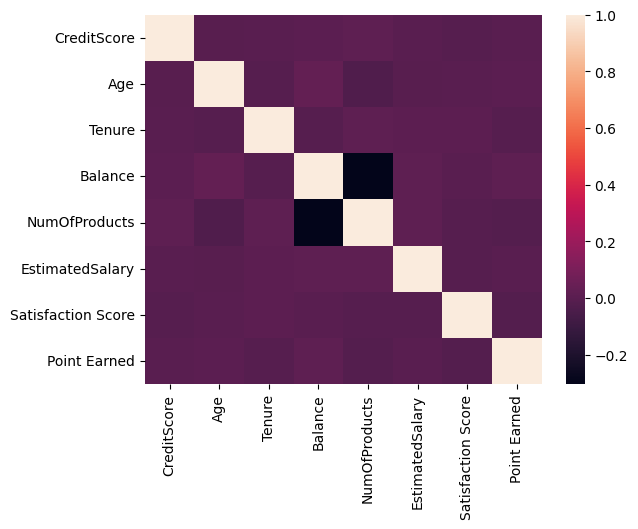

In [123]:
continuous_vars = ["CreditScore", "Age", "Tenure", "Balance",
                   "NumOfProducts", "EstimatedSalary", "Satisfaction Score", "Point Earned"]
sns.heatmap(df[continuous_vars].corr())

Looking at the above heatmap, we can clearly see that the Balance and Number of Products have a strong Negative Correlation

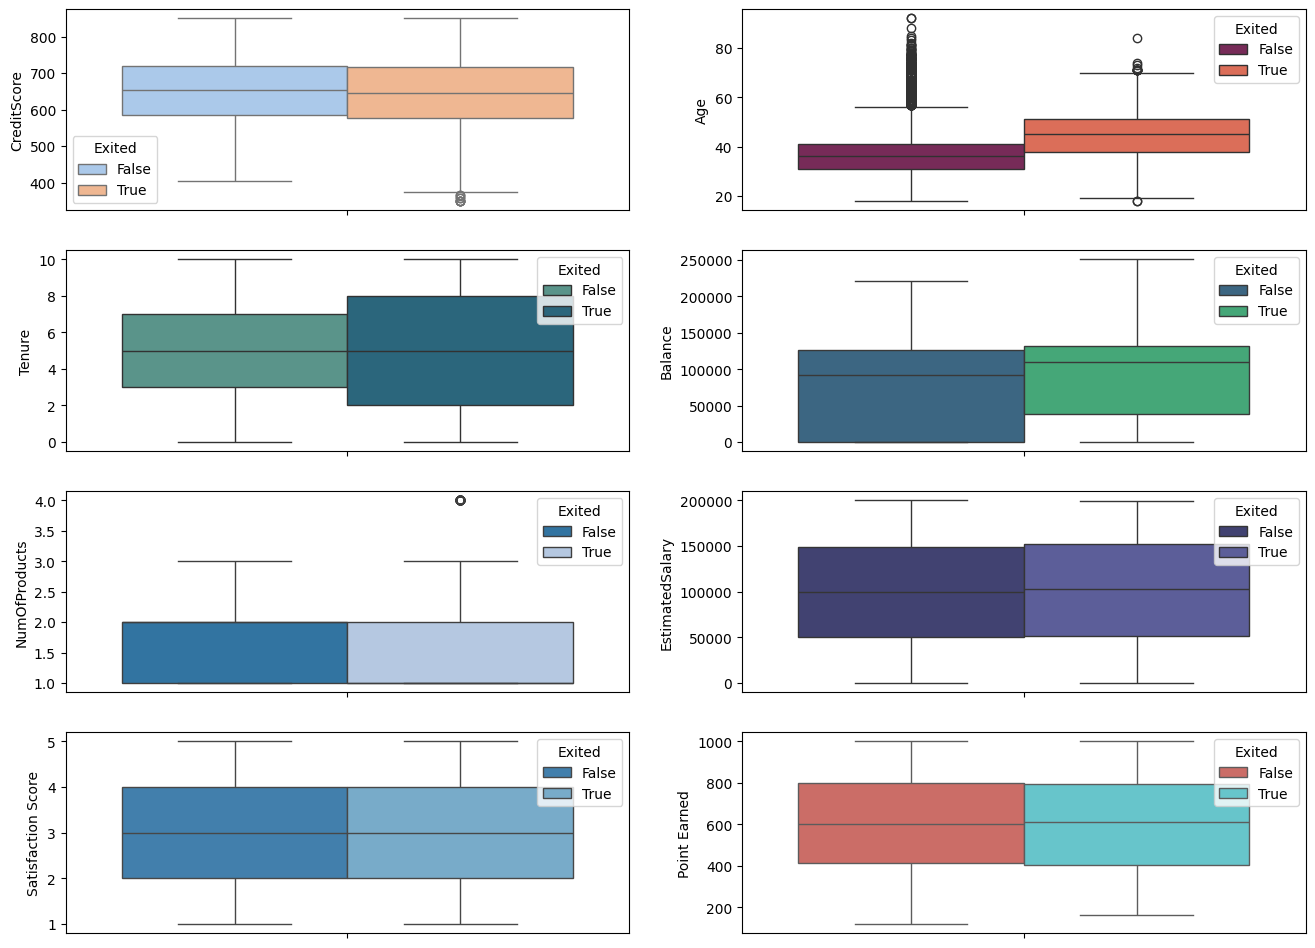

In [124]:
palette_choice = ["pastel", "rocket", "crest", "viridis", "tab20", "tab20b", "tab20c", "hls"]
fig, ax = plt.subplots(4, 2, figsize=(16, 12))
idx = 0
for i in range(4):
    for j in range(2):
        sns.boxplot(data=df, hue="Exited", y=continuous_vars[idx], palette=palette_choice[idx], ax=ax[i, j])
        idx+=1
plt.show()

With respect to the customers who've exited from using the Banks, from the above box plots, we can infer that the only significant difference in the overall IQR and median values for Tenure, Balance, and Age.

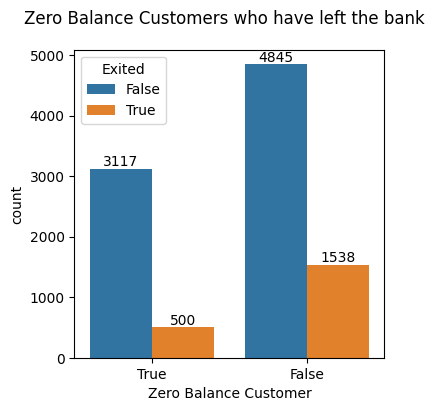

In [126]:
# Impact of zero balance and customer churn

df["Zero Balance Customer"] = np.where(df["Balance"]==0, "True", "False")
fig, _ = plt.subplots(1, 1, figsize=(4,4))
fig.suptitle("Zero Balance Customers who have left the bank")
ax = sns.countplot(data=df, x="Zero Balance Customer", hue="Exited")
for container in ax.containers:
    ax.bar_label(container)
plt.show()

In [127]:
zero_bal_churn_ratio = ((df['Balance'] == 0) & (df['Exited'])).sum() / \
    (df['Balance'] == 0).sum()
non_zero_bal_churn_ratio = ((df['Balance'] != 0) & (df['Exited'])).sum() / \
    (df['Balance'] != 0).sum()
print(f"Customers with Zero balance have a churn ratio of {zero_bal_churn_ratio*100:.2f}%")
print(f"Customers with Non-Zero balance have a churn ratio of {non_zero_bal_churn_ratio*100:.2f}%")

Customers with Zero balance have a churn ratio of 13.82%
Customers with Non-Zero balance have a churn ratio of 24.10%


Looking at the above ratio, we can see that the customers with non-zero balance have a slightly higher chances of leaving the bank than the customers having zero balance. Customers with Non-Zero balance have a churn ratio of 24.10%

In [128]:
# Total churn rate
print(f'Overall Churnrate observed = {((df["Exited"]).sum()/df["Exited"].count())*100:.2f}%')

Overall Churnrate observed = 20.38%


### Observations
- Overall Churn rate observed is abuot 20.38%.
- Highest Churn rate is observed for Germany. 32.44% of German Customers have left the bank.
- Females have a higher churn rate overall.
25.07% of female customers have left the bank.
- Customers who are inactive are more likely to leave.
26.87% of inactive members have left the bank.
- Customers belonging to age group 51-60 have a much higher churn rate than others.
56.21% of Customers belonging to age group 51-60 have left the bank.
- Customers falling under Low credit score category have highest ratio of Churn at 25.77%. That is, 25.77% of the customers with Low Credit score have left the bank.
- More than 99.5% of the Customers who have Complaints have left the Bank.
- Customers with Non-Zero balance have a churn ratio of 24.10%

> French Customers, Male Active Members aged between 18-30 years with High Credit Scores with no complaints have the highest probability of continuing with the bank.

### Recommendations
1. **Germany-Specific Initiatives**:
    - Conduct market research to understand specific reasons for the high churn rate among German customers.
    - Consider localizing services and products to better cater to the needs of German customers, possibly through customized financial products, better customer support in local languages, and localized marketing efforts.
2. **Female Customer Retention**:
    - Implement initiatives aimed at female customers, such as tailored financial products, networking events, and educational programs on financial planning and investment.
    - Create women-specific loyalty programs and perks to enhance satisfaction and retention.
3. **Older Age Group (51-60 years)**:
    - Offer financial planning services and retirement planning products to customers in the 51-60 age group.
    - Develop specific communication strategies and marketing messages that address the needs and concerns of this age group.
4. **Inactive Members**:
    - Use data analytics to identify patterns and reasons behind customer inactivity. Offer personalized re-engagement plans such as special offers, discounts, or personalized financial advice.
    - Regularly communicate with inactive customers through email, SMS, or phone calls to encourage them to re-engage with the bank’s services.
5. **Customers with Low Credit Scores**:
    - Develop educational content and financial planning workshops to help these customers improve their credit scores.
    - Provide personalized financial products and advice that can help them manage their finances better and build a stronger credit history.
6. **Complaint Management**:
    - Establish a proactive approach to handle complaints by identifying potential issues before they escalate. Use customer data and feedback to predict and prevent complaints.
    - Regularly monitor customer satisfaction levels and follow up with customers who have lodged complaints to ensure their issues are fully resolved.
7. **Customers with Non-Zero Balance**:
    - Introduce benefits and rewards for maintaining a non-zero balance, such as higher interest rates, waived fees, or loyalty points.
    - Offer personalized financial advice to help these customers manage their funds more effectively and highlight the benefits of staying with the bank.

8. **Customer Feedback and Service Improvement**:
    - Implement a robust feedback system to identify the reasons behind customer dissatisfaction and complaints.
    - Enhance customer service training to ensure all customer interactions are positive and resolving complaints efficiently.